- SIMPLE LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

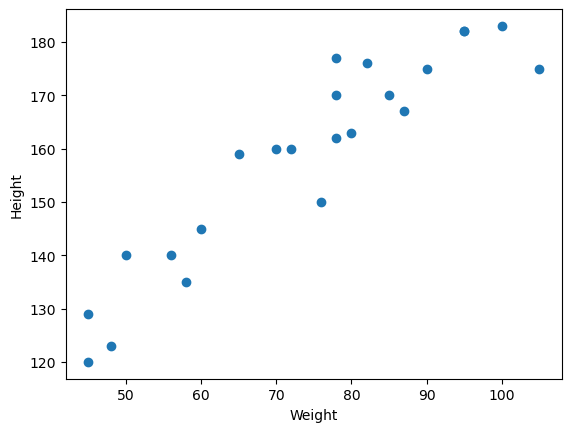

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [11]:
##divide our dataset into independent and dependent features
X=df[['Weight']]##independent features
y=df['Height']## dependent features

In [12]:
x.shape,y.shape

((23, 1), (23,))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [15]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [16]:
y_train.shape,y_test.shape

((18,), (5,))

In [21]:
from sklearn.preprocessing import StandardScaler


In [22]:
scaler=StandardScaler()

In [25]:
X_train=scaler.fit_transform(X_train)

In [26]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [27]:
X_test=scaler.transform(X_test)

In [28]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

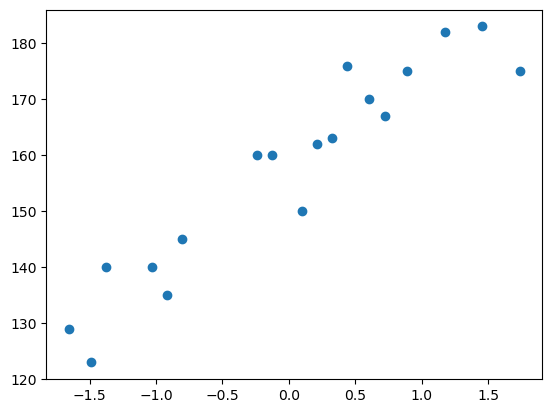

In [30]:
plt.scatter(X_train,y_train)

In [31]:
##model training 
from sklearn.linear_model import LinearRegression

In [32]:
regressor=LinearRegression()

In [33]:
##training the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
regressor.intercept_

157.5

In [35]:
regressor.coef_

array([17.03440872])

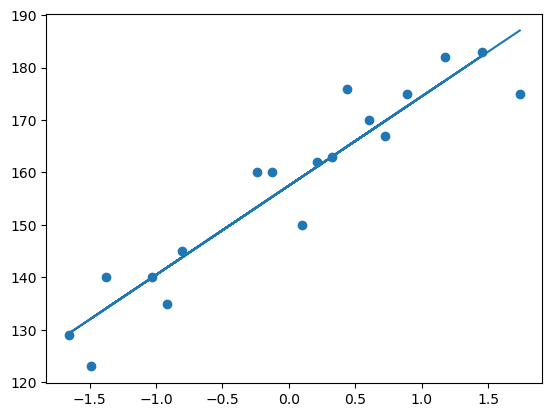

In [37]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

In [39]:
##prediction for test data
y_pred_test=regressor.predict(X_test)

In [40]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [41]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## performance matrics MAE,MSE,RMSE

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error 

In [43]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

In [44]:
mse,mae,rmse


(109.77592599051664, 9.822657814519232, 10.477400726827081)

In [61]:
##accuracy of model R squared and adjusted R squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

0.776986986042344